In [1]:
# Data Management
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Sklearn
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
ebola= pd.read_csv('Ebola/ebola_2014_2016_clean.csv')
ebola.head()

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0


In [3]:
ebolaformat= pd.read_csv('Ebola/ebola_data_db_format.csv')
ebolaformat.head()

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0


In [4]:
#Grouping data into years
e_2014 = ebola[ebola['Date'] == 2014].reset_index()
e_2014_grp = e_2014.groupby('Country')['Cumulative no. of confirmed, probable and suspected cases', 'Cumulative no. of confirmed, probable and suspected deaths'].sum().reset_index()

e_2015 = ebola[ebola['Date'] == 2015].reset_index()
e_2015_grp = e_2015.groupby('Country')['Cumulative no. of confirmed, probable and suspected cases', 'Cumulative no. of confirmed, probable and suspected deaths'].sum().reset_index()


e_2016 = ebola[ebola['Date'] == 2016].reset_index()
e_2016_grp = e_2016.groupby('Country')['Cumulative no. of confirmed, probable and suspected cases', 'Cumulative no. of confirmed, probable and suspected deaths'].sum().reset_index()


ebola_total = ebola
ebola_total = ebola_total.groupby(['Date', 'Country'])['Cumulative no. of confirmed, probable and suspected cases', 'Cumulative no. of confirmed, probable and suspected deaths'].sum()
ebola_total = ebola_total.reset_index()
print(ebola_total['Country'].value_counts().count())

10


c:\users\dia15\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\dia15\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
c:\users\dia15\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.
c:\users\dia15\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be dep

In [5]:
ebola_total

,Date,Country,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,2014-08-29,Guinea,648.0,430.0
1,2014-08-29,Liberia,1378.0,694.0
2,2014-08-29,Nigeria,19.0,7.0
3,2014-08-29,Sierra Leone,1026.0,422.0
4,2014-09-05,Guinea,812.0,517.0
...,...,...,...,...
2374,2016-03-23,Senegal,1.0,0.0
2375,2016-03-23,Sierra Leone,14122.0,3955.0
2376,2016-03-23,Spain,1.0,0.0
2377,2016-03-23,United Kingdom,1.0,0.0


In [6]:
import plotly.express as px
temp2 = ebola.groupby(['Date','Country'])['Cumulative no. of confirmed, probable and suspected cases','Cumulative no. of confirmed, probable and suspected deaths'].sum().reset_index()
temp2.head()
fig = px.line(temp2, x="z", y="Cumulative no. of confirmed, probable and suspected cases", color='Country',width=800, height=400)
fig.show()

c:\users\dia15\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Date', 'Country', 'Cumulative no. of confirmed, probable and suspected cases', 'Cumulative no. of confirmed, probable and suspected deaths'] but received: z

In [56]:
import plotly.express as px
fig = px.line(temp2, x="Date", y="Cumulative no. of confirmed, probable and suspected deaths", color='Country',width=800, height=400)
fig.show()

In [57]:
date_data = ebola.groupby(['Date']).sum()
date_data.head()

,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
Date,,
2014-08-29,3071.0,1553.0
2014-09-05,3967.0,2105.0
2014-09-08,4293.0,2296.0
2014-09-12,4390.0,2226.0
2014-09-16,4985.0,2461.0


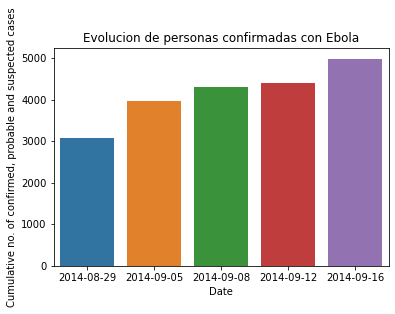

In [58]:
plt.title("Evolucion de personas confirmadas con Ebola")
max_x=date_data.loc[['2014-08-29', '2014-09-05', '2014-09-08', '2014-09-12', '2014-09-16']]
sns.barplot(x=max_x.index, y=max_x['Cumulative no. of confirmed, probable and suspected cases'])

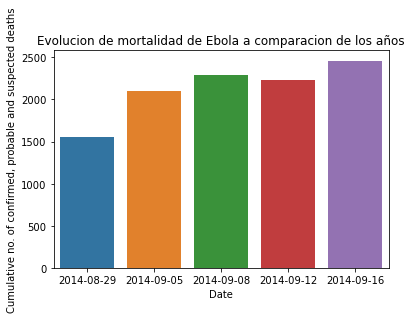

In [59]:
plt.title("Evolucion de mortalidad de Ebola a comparacion de los años")
max_x=date_data.loc[['2014-08-29', '2014-09-05', '2014-09-08', '2014-09-12', '2014-09-16']]
sns.barplot(x=max_x.index, y=max_x['Cumulative no. of confirmed, probable and suspected deaths'])

In [60]:
por_ano = ebola.groupby(ebola['Date'].map(lambda x: x.year))


AttributeError: 'str' object has no attribute 'year'

In [ ]:
por_ano.head()

In [ ]:
ebola.groupby(ebola.Date.dt.year).head()

In [ ]:
print(ebola.groupby(lambda x: ebola['Date'][x].year))


In [61]:
ebola['year'] = ebola['Date'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [62]:
ebola

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0
...,...,...,...,...
2480,Liberia,2016-03-23,10666.0,4806.0
2481,Italy,2016-03-23,1.0,0.0
2482,Liberia,2016-03-23,5.0,4.0
2483,Nigeria,2016-03-23,20.0,8.0


In [63]:
date_data = ebola.groupby(['year']).sum()
date_data.head()

KeyError: 'year'

KeyError: "None of [Int64Index([2014, 2015, 2016], dtype='int64', name='Date')] are in the [index]"

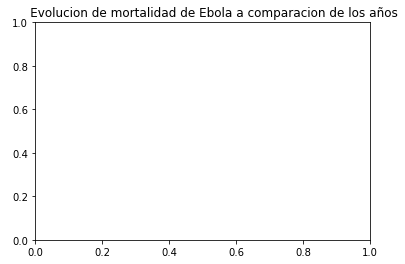

In [64]:
plt.title("      Evolucion de mortalidad de Ebola a comparacion de los años")
max_x=date_data.loc[[2014, 2015, 2016]]
sns.barplot(x=max_x.index, y=max_x['Cumulative no. of confirmed, probable and suspected deaths'])

In [ ]:
plt.title("Evolucion de mortalidad de Ebola a comparacion de los años")
max_x=date_data.loc[[2014, 2015, 2016]]
sns.barplot(x=max_x.index, y=max_x['Cumulative no. of confirmed, probable and suspected cases'])

In [65]:
ebola_clean= pd.read_csv('Ebola/ebola_2014_2016_clean.csv')
ebola_clean.head()

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0


In [66]:
def plot_cfr(epidemic, mid, end):
    '''Plot case fatality rate'''
    inc_day = []
    for i in range(1, 101):
        if(i<=mid):
            inc_day.append(2)
        elif(i<end):
            inc_day.append(1)
        else:
            inc_day.append(0)
    inc_day = np.array(inc_day)
    inc_day = inc_day.reshape(20, 5).T
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax=sns.heatmap(inc_day, linewidths=2, square=True, xticklabels='', 
                   yticklabels='', ax=ax, cbar=False, 
                   cmap=['darkgray', 'coral','orangered'])
    ax.set_title(epidemic, fontdict={'fontsize':16}, loc='left', pad=15)
    
    plt.show()

In [67]:
def plot_cal(title, start, end):
    '''Plot incubation period'''
    inc_day = []
    for i in range(1, 29):
        if(i>=start and i<=end):
            inc_day.append(1)
        else:
            inc_day.append(0)
            
    inc_day = np.array(inc_day)
    inc_day = inc_day.reshape(4, 7)
    
    fig, ax = plt.subplots(figsize=(6, 3))
    ax=sns.heatmap(inc_day, linewidths=2, square=True, 
                   xticklabels='', yticklabels='', ax=ax,
                   cbar=False, cmap=['whitesmoke','royalblue'])
    ax.set_title(title, fontdict={'fontsize':16}, loc='left', pad=15)
    
    plt.show()

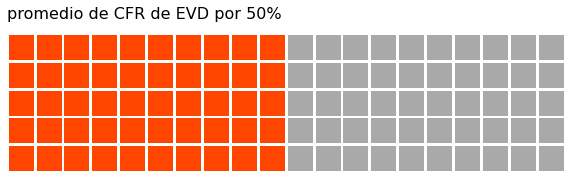

In [68]:
plot_cfr('promedio de CFR de EVD por 50%', 50, 50)

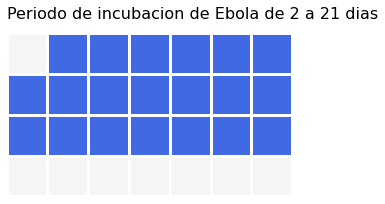

In [69]:
plot_cal('Periodo de incubacion de Ebola de 2 a 21 dias', 2, 21)

In [70]:
import plotly.express as px
latest = df[df['Date']==max(df['Date'])]
latest = latest.sort_values('Cumulative no. of confirmed, probable and suspected cases', ascending=False)
latest = latest.reset_index()
fig = px.treemap(latest.sort_values(by="Cumulative no. of confirmed, probable and suspected cases", ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Cumulative no. of confirmed, probable and suspected cases", 
                 title='Proporcion de acumulacion de casos',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

NameError: name 'df' is not defined

In [71]:
high_df = latest.iloc[:5]
high_melt = high_df.melt(id_vars = 'Country', 
                         value_vars=['Cumulative no. of confirmed, probable and suspected cases', 'Cumulative no. of confirmed, probable and suspected deaths'], 
                         var_name='Case', value_name='Count')
fig = px.bar(high_melt, x='Count', y='Country', color='Case', text='Count',
             orientation='h', width=700, height=400, barmode='group', 
             color_discrete_sequence=['#46768c', '#444444'])
fig.update_layout(title='Casos de Ebola Confirmados y Mortalidad Para Paises Mas Efectados', xaxis_title="", yaxis_title="")
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

NameError: name 'latest' is not defined

In [72]:
high_df = latest.iloc[5:]
high_melt = high_df.melt(id_vars = 'Country', 
                         value_vars=['Cumulative no. of confirmed, probable and suspected cases', 'Cumulative no. of confirmed, probable and suspected deaths'], 
                         var_name='Case', value_name='Count')
fig = px.bar(high_melt, x='Count', y='Country', color='Case', text='Count',
             orientation='h', width=700, height=400, barmode='group', 
             color_discrete_sequence=['#46768c', '#444444'])
fig.update_layout(title='Casos de Ebola Confirmados y Mortalidad Para Paises Menos Efectados', xaxis_title="", yaxis_title="")
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

NameError: name 'latest' is not defined